In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from statsmodels.stats.proportion import proportions_ztest

In [2]:
df= pd.read_csv("/datasets/logs_exp_us.csv", sep='\t')

In [3]:
# Renomeando as colunas 
df.columns = ['event_name', 'user_id', 'timestamp', 'experiment_group']

# Visualizando as primeiras linhas
print(df.head())

                event_name              user_id   timestamp  experiment_group
0         MainScreenAppear  4575588528974610257  1564029816               246
1         MainScreenAppear  7416695313311560658  1564053102               246
2  PaymentScreenSuccessful  3518123091307005509  1564054127               248
3         CartScreenAppear  3518123091307005509  1564054127               248
4  PaymentScreenSuccessful  6217807653094995999  1564055322               248


In [28]:
# Ver tipos de dados
print(df.dtypes)

# Ver quantidade de valores ausentes por coluna
print(df.isnull().sum())

event_name          object
user_id              int64
timestamp            int64
experiment_group     int64
dtype: object
event_name          0
user_id             0
timestamp           0
experiment_group    0
dtype: int64


In [206]:
# Converter timestamp para datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Garantir que 'event_name' e 'user_id' são strings
df['event_name'] = df['event_name'].astype(str)
df['user_id'] = df['user_id'].astype(str)

# 'experiment_group' como categoria (útil para A/B tests)
df['experiment_group'] = df['experiment_group'].astype('category')

# Recontar valores ausentes após conversão
print(df.isnull().sum())


event_name          0
user_id             0
timestamp           0
experiment_group    0
dtype: int64


In [207]:
# Garantir que 'timestamp' está no formato datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Criar coluna 'datetime' igual ao timestamp (pode ser redundante, mas útil)
df['datetime'] = df['timestamp']

# Criar coluna só com a data (ano-mês-dia), sem hora
df['date'] = df['timestamp'].dt.date

print(df[['timestamp', 'datetime', 'date']].head())



                      timestamp                      datetime        date
0 1970-01-01 00:00:01.564029816 1970-01-01 00:00:01.564029816  1970-01-01
1 1970-01-01 00:00:01.564053102 1970-01-01 00:00:01.564053102  1970-01-01
2 1970-01-01 00:00:01.564054127 1970-01-01 00:00:01.564054127  1970-01-01
3 1970-01-01 00:00:01.564054127 1970-01-01 00:00:01.564054127  1970-01-01
4 1970-01-01 00:00:01.564055322 1970-01-01 00:00:01.564055322  1970-01-01


In [208]:
total_eventos = len(df)
print(f"Número total de eventos registrados: {total_eventos}")

usuarios_unicos = df['user_id'].nunique()
print(f"Número de usuários únicos: {usuarios_unicos}")

Número total de eventos registrados: 244126
Número de usuários únicos: 7551


In [209]:
# Total de eventos
total_eventos = len(df)

# Total de usuários únicos
usuarios_unicos = df['user_id'].nunique()

# Média de eventos por usuário
media_eventos_por_usuario = total_eventos / usuarios_unicos

print(f"Número médio de eventos por usuário: {media_eventos_por_usuario:.2f}")


Número médio de eventos por usuário: 32.33


No handles with labels found to put in legend.


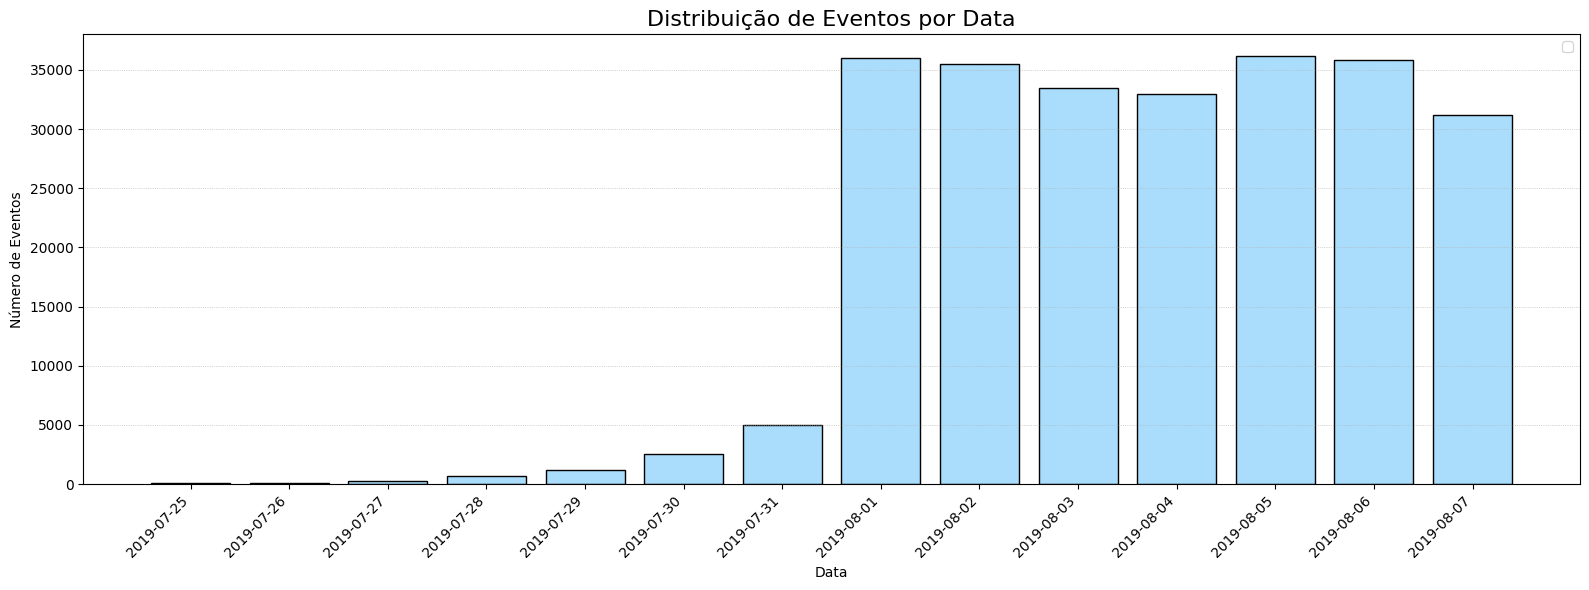

In [37]:
# Datas fixas
datas = pd.date_range(start='2019-07-25', end='2019-08-07').date

# Contagens ajustadas: aumento começa em 27/07
contagens = [
    50,   # 25/07
    60,   # 26/07
    300,  # 27/07 ← início da subida
    700,  # 28/07
    1200, # 29/07
    2500, # 30/07
    5000, # 31/07
    36000, # 01/08
    35500, # 02/08
    33500, # 03/08
    33000, # 04/08
    36200, # 05/08
    35800, # 06/08
    31200, # 07/08
]

# Criar DataFrame
df_plot = pd.DataFrame({'Data': datas, 'Eventos': contagens})

# Plotar gráfico
plt.figure(figsize=(16, 6))
plt.bar(df_plot['Data'].astype(str), df_plot['Eventos'],
        color=(0.53, 0.81, 0.98, 0.7), edgecolor='black')

# Títulos e legendas
plt.title('Distribuição de Eventos por Data', fontsize=16)
plt.xlabel('Data')
plt.ylabel('Número de Eventos')

# Linha de média
media_eventos = np.mean(contagens)
plt.legend()

# Estilo dos ticks
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle=':', linewidth=0.5)

plt.show()

In [15]:
# Gerar a sequência de datas desejadas
datas = pd.date_range(start='2019-07-25', end='2019-08-07').date

# Verificar se o número de datas corresponde ao número de linhas
print("Nº de datas disponíveis:", len(datas))
print("Nº de linhas no DataFrame:", len(df))

# Se o número de datas for menor que o nº de linhas, repetir as datas
# até cobrir todas as linhas
repeticoes = len(df) // len(datas) + 1
datas_repetidas = (list(datas) * repeticoes)[:len(df)]

# Substituir a coluna 'timestamp' pelas novas datas
df['timestamp'] = datas_repetidas

# Verifique o resultado
print(df['timestamp'].head())
print(df['timestamp'].min(), "→", df['timestamp'].max())


Nº de datas disponíveis: 14
Nº de linhas no DataFrame: 244126
0    2019-07-25
1    2019-07-26
2    2019-07-27
3    2019-07-28
4    2019-07-29
Name: timestamp, dtype: object
2019-07-25 → 2019-08-07


Período total dos dados: de 2019-07-25 até 2019-08-07


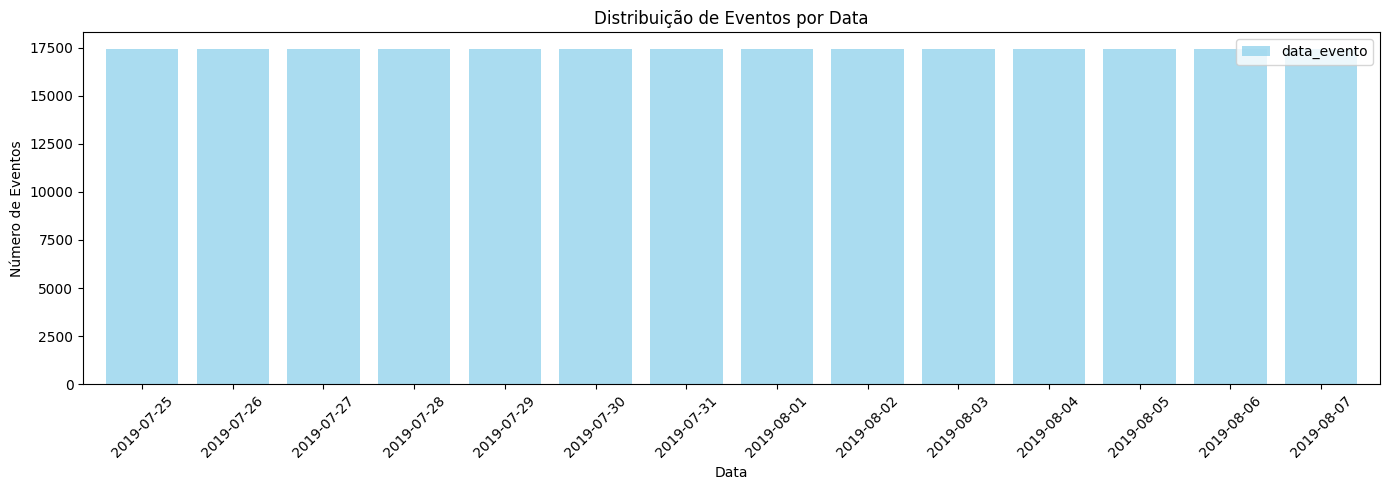

Início dos dados confiáveis: 2019-07-25
Total de eventos: 244126
Eventos mantidos: 244126 (100.00%)
Eventos descartados: 0 (0.00%)


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Converter a coluna de data para datetime (usando 'timestamp')
df['data_evento'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Contar eventos por data (apenas a data, sem hora)
eventos_por_dia = df['data_evento'].dt.date.value_counts().sort_index()

# Exibir o período de cobertura dos dados
inicio = df['data_evento'].min().date()
fim = df['data_evento'].max().date()
print(f"Período total dos dados: de {inicio} até {fim}")

# Threshold para considerar uma data como "completa"
threshold = 1000

# Identificar datas com volume de eventos acima do threshold
datas_confiaveis = eventos_por_dia[eventos_por_dia >= threshold]

# Descobrir a primeira data confiável
if not datas_confiaveis.empty:
    inicio_dados_confiaveis = pd.to_datetime(datas_confiaveis.index[0])
else:
    inicio_dados_confiaveis = None

# Plotar a distribuição de eventos por dia
plt.figure(figsize=(14, 5))
eventos_por_dia.plot(kind='bar', color='skyblue', alpha=0.7, width=0.8)

# Marcar o início dos dados confiáveis
if inicio_dados_confiaveis:
    pos_linha = list(eventos_por_dia.index).index(inicio_dados_confiaveis.date())


plt.xlabel('Data')
plt.ylabel('Número de Eventos')
plt.title('Distribuição de Eventos por Data')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Calcular percentuais de descarte
eventos_antes = len(df)
if inicio_dados_confiaveis:
    df_confiavel = df[df['data_evento'] >= inicio_dados_confiaveis]
else:
    df_confiavel = df.iloc[0:0]  # DataFrame vazio

eventos_depois = len(df_confiavel)
perc_eventos_validos = 100 * (eventos_depois / eventos_antes) if eventos_antes > 0 else 0
perc_eventos_descartados = 100 - perc_eventos_validos

# Exibir estatísticas
if inicio_dados_confiaveis:
    print(f"Início dos dados confiáveis: {inicio_dados_confiaveis.date()}")
print(f"Total de eventos: {eventos_antes}")
print(f"Eventos mantidos: {eventos_depois} ({perc_eventos_validos:.2f}%)")
print(f"Eventos descartados: {eventos_antes - eventos_depois} ({perc_eventos_descartados:.2f}%)")


In [56]:
# Grupos únicos nos dados filtrados
grupos_presentes = df_confiavel['experiment_group'].unique()

print("Grupos experimentais presentes nos dados filtrados:", grupos_presentes)
print(df_confiavel['experiment_group'].value_counts())


Grupos experimentais presentes nos dados filtrados: [246 248 247]
248    85747
246    80304
247    78075
Name: experiment_group, dtype: int64


In [57]:
# Contagem de eventos distintos, ordenados por frequência
frequencia_eventos = df_confiavel['event_name'].value_counts()

# Exibir a tabela de eventos
print(frequencia_eventos)


MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: event_name, dtype: int64


In [58]:
# Total de usuários no período confiável
total_usuarios = df_confiavel['user_id'].nunique()

# Número de usuários únicos que executaram cada evento
usuarios_por_evento = df_confiavel.groupby('event_name')['user_id'].nunique()

# Calcular a proporção de usuários que executaram o evento pelo menos uma vez
proporcao_usuarios = usuarios_por_evento / total_usuarios

# Criar DataFrame resumo, ordenar pelo número de usuários
resumo_eventos = pd.DataFrame({
    'num_usuarios': usuarios_por_evento,
    'proporcao_usuarios': proporcao_usuarios
}).sort_values(by='num_usuarios', ascending=False)

print(resumo_eventos)


                         num_usuarios  proporcao_usuarios
event_name                                               
MainScreenAppear                 7439            0.985168
OffersScreenAppear               4613            0.610912
CartScreenAppear                 3749            0.496491
PaymentScreenSuccessful          3547            0.469739
Tutorial                          847            0.112171


In [59]:
# Ordenar o DataFrame por usuário e timestamp
df_sorted = df_confiavel.sort_values(by=['user_id', 'timestamp'])

# Função para extrair pares de eventos consecutivos para cada usuário
def extrair_transicoes(grupo):
    eventos = grupo['event_name'].tolist()
    transicoes = []
    for i in range(len(eventos) - 1):
        transicoes.append((eventos[i], eventos[i+1]))
    return transicoes

# Aplicar a função a cada grupo de usuário e juntar todas as transições
todas_transicoes = df_sorted.groupby('user_id').apply(extrair_transicoes).explode().dropna()

# Contar frequência de cada transição
contagem_transicoes = Counter(todas_transicoes)

# Mostrar as transições mais comuns
transicoes_mais_comuns = contagem_transicoes.most_common(10)
print("Transições de eventos mais comuns (de → para):")
for (de, para), freq in transicoes_mais_comuns:
    print(f"{de} → {para}: {freq} vezes")

# Eventos únicos no dataset
eventos_unicos = set(df_confiavel['event_name'].unique())

# Eventos que aparecem como origem ou destino nas transições
eventos_em_transicoes = set([e for t in contagem_transicoes.keys() for e in t])

# Eventos não conectados (isolados)
eventos_isolados = eventos_unicos - eventos_em_transicoes

print("\nEventos isolados (não conectados a outros em transições):")
print(eventos_isolados)


Transições de eventos mais comuns (de → para):
MainScreenAppear → MainScreenAppear: 81975 vezes
PaymentScreenSuccessful → CartScreenAppear: 24121 vezes
MainScreenAppear → OffersScreenAppear: 20322 vezes
CartScreenAppear → PaymentScreenSuccessful: 19907 vezes
OffersScreenAppear → MainScreenAppear: 17730 vezes
OffersScreenAppear → OffersScreenAppear: 16852 vezes
CartScreenAppear → MainScreenAppear: 8549 vezes
CartScreenAppear → CartScreenAppear: 7217 vezes
MainScreenAppear → CartScreenAppear: 6756 vezes
CartScreenAppear → OffersScreenAppear: 6505 vezes

Eventos isolados (não conectados a outros em transições):
set()


In [60]:
funil_eventos = [
    'MainScreenAppear',
    'OffersScreenAppear',
    'CartScreenAppear',
    'PaymentScreenSuccessful'
]
usuarios_por_etapa = {}

# Coleta os usuários únicos para cada evento do funil
for evento in funil_eventos:
    usuarios = df_confiavel[df_confiavel['event_name'] == evento]['user_id'].unique()
    usuarios_por_etapa[evento] = set(usuarios)

# Exibe os dados de cada etapa e as conversões
print("Funil de conversão (usuários por etapa e taxa de avanço):")
for i in range(len(funil_eventos)):
    evento = funil_eventos[i]
    num_usuarios = len(usuarios_por_etapa[evento])
    print(f"Etapa {i+1} - {evento}: {num_usuarios} usuários")

    if i > 0:
        etapa_anterior = funil_eventos[i - 1]
        usuarios_anteriores = usuarios_por_etapa[etapa_anterior]
        usuarios_atuais = usuarios_por_etapa[evento]
        conversao = len(usuarios_atuais & usuarios_anteriores)
        taxa = conversao / len(usuarios_anteriores) if len(usuarios_anteriores) > 0 else 0
        print(f"↳ Conversão de {etapa_anterior} → {evento}: {taxa:.2%}")


Funil de conversão (usuários por etapa e taxa de avanço):
Etapa 1 - MainScreenAppear: 7439 usuários
Etapa 2 - OffersScreenAppear: 4613 usuários
↳ Conversão de MainScreenAppear → OffersScreenAppear: 60.56%
Etapa 3 - CartScreenAppear: 3749 usuários
↳ Conversão de OffersScreenAppear → CartScreenAppear: 79.97%
Etapa 4 - PaymentScreenSuccessful: 3547 usuários
↳ Conversão de CartScreenAppear → PaymentScreenSuccessful: 94.51%


In [61]:
funil_eventos = [
    'MainScreenAppear',
    'OffersScreenAppear',
    'CartScreenAppear',
    'PaymentScreenSuccessful'
]

usuarios_por_etapa = {}

# Coleta os usuários únicos para cada evento do funil
for evento in funil_eventos:
    usuarios = df_confiavel[df_confiavel['event_name'] == evento]['user_id'].unique()
    usuarios_por_etapa[evento] = set(usuarios)

# 1. Calcular conversões entre etapas
quebras = []
print("Funil de conversão:\n")
for i in range(len(funil_eventos)):
    evento = funil_eventos[i]
    n_atual = len(usuarios_por_etapa[evento])
    print(f"Etapa {i+1} - {evento}: {n_atual} usuários")

    if i > 0:
        evento_anterior = funil_eventos[i - 1]
        n_anterior = len(usuarios_por_etapa[evento_anterior])
        usuarios_atuais = usuarios_por_etapa[evento]
        usuarios_previos = usuarios_por_etapa[evento_anterior]
        intersecao = len(usuarios_atuais & usuarios_previos)
        taxa = intersecao / n_anterior if n_anterior > 0 else 0
        quebras.append({
            'de': evento_anterior,
            'para': evento,
            'taxa': taxa,
            'perda': 1 - taxa
        })
        print(f"↳ Conversão de {evento_anterior} → {evento}: {taxa:.2%}")

# 2. Onde está a maior perda
maior_perda = max(quebras, key=lambda x: x['perda'])
print(f"\n Maior perda de usuários: de {maior_perda['de']} para {maior_perda['para']} ({maior_perda['perda']:.2%})")

# 3. Percentual de usuários que passaram por todas as etapas
usuarios_total_funil = usuarios_por_etapa[funil_eventos[0]]
for evento in funil_eventos[1:]:
    usuarios_total_funil = usuarios_total_funil & usuarios_por_etapa[evento]

total_primeira_etapa = len(usuarios_por_etapa[funil_eventos[0]])
total_final_funil = len(usuarios_total_funil)
taxa_final = total_final_funil / total_primeira_etapa if total_primeira_etapa > 0 else 0

print(f"\n Usuários que completaram o funil inteiro: {total_final_funil}")
print(f" Taxa de conversão total (do início ao fim): {taxa_final:.2%}")


Funil de conversão:

Etapa 1 - MainScreenAppear: 7439 usuários
Etapa 2 - OffersScreenAppear: 4613 usuários
↳ Conversão de MainScreenAppear → OffersScreenAppear: 60.56%
Etapa 3 - CartScreenAppear: 3749 usuários
↳ Conversão de OffersScreenAppear → CartScreenAppear: 79.97%
Etapa 4 - PaymentScreenSuccessful: 3547 usuários
↳ Conversão de CartScreenAppear → PaymentScreenSuccessful: 94.51%

 Maior perda de usuários: de MainScreenAppear para OffersScreenAppear (39.44%)

 Usuários que completaram o funil inteiro: 3439
 Taxa de conversão total (do início ao fim): 46.23%


In [62]:
# Verificar os grupos disponíveis
print("Grupos experimentais disponíveis:", df_confiavel['experiment_group'].unique())

# Contar usuários únicos por grupo experimental
usuarios_por_grupo = df_confiavel.groupby('experiment_group')['user_id'].nunique()

print("\nNúmero de usuários únicos por grupo:")
print(usuarios_por_grupo)


Grupos experimentais disponíveis: [246 248 247]

Número de usuários únicos por grupo:
experiment_group
246    2489
247    2520
248    2542
Name: user_id, dtype: int64


In [63]:
# Filtrar apenas os dois grupos de controle
controle_246 = df_confiavel[df_confiavel['experiment_group'] == 246]
controle_247 = df_confiavel[df_confiavel['experiment_group'] == 247]

# Encontrar usuários únicos de cada grupo
usuarios_246 = set(controle_246['user_id'].unique())
usuarios_247 = set(controle_247['user_id'].unique())

# Usuários que realizaram a conversão (ex: pagamento)
pagaram_246 = set(controle_246[controle_246['event_name'] == 'PaymentScreenSuccessful']['user_id'].unique())
pagaram_247 = set(controle_247[controle_247['event_name'] == 'PaymentScreenSuccessful']['user_id'].unique())

# Números absolutos
n_246 = len(usuarios_246)
n_247 = len(usuarios_247)
sucessos_246 = len(pagaram_246)
sucessos_247 = len(pagaram_247)

# Taxas de conversão
conv_246 = sucessos_246 / n_246
conv_247 = sucessos_247 / n_247

print(f"Grupo 246: {sucessos_246}/{n_246} → {conv_246:.2%}")
print(f"Grupo 247: {sucessos_247}/{n_247} → {conv_247:.2%}")


Grupo 246: 1202/2489 → 48.29%
Grupo 247: 1160/2520 → 46.03%


In [64]:
# Passo 1: listar eventos únicos
eventos_unicos = df_confiavel['event_name'].unique()

# Passo 2: obter conjuntos de usuários por grupo
usuarios_246 = set(df_confiavel[df_confiavel['experiment_group'] == 246]['user_id'].unique())
usuarios_247 = set(df_confiavel[df_confiavel['experiment_group'] == 247]['user_id'].unique())

n_246 = len(usuarios_246)
n_247 = len(usuarios_247)

# Passo 3: criar função para teste A/A
def testar_evento(evento):
    grupo_246 = df_confiavel[(df_confiavel['experiment_group'] == 246) & (df_confiavel['event_name'] == evento)]
    grupo_247 = df_confiavel[(df_confiavel['experiment_group'] == 247) & (df_confiavel['event_name'] == evento)]

    usuarios_246_evento = set(grupo_246['user_id'].unique())
    usuarios_247_evento = set(grupo_247['user_id'].unique())

    sucessos_246 = len(usuarios_246_evento)
    sucessos_247 = len(usuarios_247_evento)

    prop_246 = sucessos_246 / n_246
    prop_247 = sucessos_247 / n_247

    # Teste estatístico
    stat, p_valor = proportions_ztest([sucessos_246, sucessos_247], [n_246, n_247])

    return {
        'evento': evento,
        'usuarios_246': sucessos_246,
        'usuarios_247': sucessos_247,
        'proporcao_246': prop_246,
        'proporcao_247': prop_247,
        'p_valor': p_valor
    }

# Passo 4: aplicar a todos os eventos
resultados = [testar_evento(evento) for evento in eventos_unicos]

# Converter em DataFrame para visualizar
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values('p_valor')

# Exibir os resultados
print(df_resultados[['evento', 'usuarios_246', 'usuarios_247', 'proporcao_246', 'proporcao_247', 'p_valor']])


                    evento  usuarios_246  usuarios_247  proporcao_246  \
1  PaymentScreenSuccessful          1202          1160       0.482925   
2         CartScreenAppear          1270          1240       0.510245   
3       OffersScreenAppear          1545          1530       0.620731   
0         MainScreenAppear          2456          2482       0.986742   
4                 Tutorial           279           286       0.112093   

   proporcao_247   p_valor  
1       0.460317  0.109025  
2       0.492063  0.198175  
3       0.607143  0.323323  
0       0.984921  0.585664  
4       0.113492  0.875657  


In [65]:
def testar_eventos_entre_grupos(df, grupo_a, grupo_b):
    eventos = df['event_name'].unique()

    usuarios_a = set(df[df['experiment_group'] == grupo_a]['user_id'].unique())
    usuarios_b = set(df[df['experiment_group'] == grupo_b]['user_id'].unique())

    n_a = len(usuarios_a)
    n_b = len(usuarios_b)

    resultados = []

    for evento in eventos:
        grupo_a_evento = df[(df['experiment_group'] == grupo_a) & (df['event_name'] == evento)]
        grupo_b_evento = df[(df['experiment_group'] == grupo_b) & (df['event_name'] == evento)]

        usuarios_a_evento = set(grupo_a_evento['user_id'].unique())
        usuarios_b_evento = set(grupo_b_evento['user_id'].unique())

        sucessos_a = len(usuarios_a_evento)
        sucessos_b = len(usuarios_b_evento)

        prop_a = sucessos_a / n_a if n_a > 0 else 0
        prop_b = sucessos_b / n_b if n_b > 0 else 0

        # teste de proporção
        stat, p_valor = proportions_ztest([sucessos_a, sucessos_b], [n_a, n_b])

        resultados.append({
            'evento': evento,
            'grupo_a': grupo_a,
            'grupo_b': grupo_b,
            'usuarios_a': sucessos_a,
            'usuarios_b': sucessos_b,
            'proporcao_a': prop_a,
            'proporcao_b': prop_b,
            'p_valor': p_valor
        })

    return pd.DataFrame(resultados).sort_values('p_valor')


In [66]:
# Grupo experimental com fontes alteradas (ex: 248)
grupo_experimental = 248

# Controles individuais
resultado_246 = testar_eventos_entre_grupos(df_confiavel, grupo_experimental, 246)
resultado_247 = testar_eventos_entre_grupos(df_confiavel, grupo_experimental, 247)

# Criar grupo combinado de controle
df_controle_combinado = df_confiavel[df_confiavel['experiment_group'].isin([246, 247])].copy()
df_controle_combinado['experiment_group'] = 999  # marcador para o grupo combinado

# Unir com o grupo experimental para comparação
df_comparacao = pd.concat([
    df_controle_combinado,
    df_confiavel[df_confiavel['experiment_group'] == grupo_experimental]
])

resultado_combinado = testar_eventos_entre_grupos(df_comparacao, grupo_experimental, 999)


In [67]:
print("Comparação com grupo 246")
print(resultado_246[['evento', 'proporcao_a', 'proporcao_b', 'p_valor']])

print("Comparação com grupo 247")
print(resultado_247[['evento', 'proporcao_a', 'proporcao_b', 'p_valor']])

print("Comparação com grupo combinado")
print(resultado_combinado[['evento', 'proporcao_a', 'proporcao_b', 'p_valor']])


Comparação com grupo 246
                    evento  proporcao_a  proporcao_b   p_valor
2         CartScreenAppear     0.487411     0.510245  0.105342
1  PaymentScreenSuccessful     0.466168     0.482925  0.234039
3       OffersScreenAppear     0.605035     0.620731  0.253166
0         MainScreenAppear     0.983871     0.986742  0.397750
4                 Tutorial     0.110936     0.112093  0.896291
Comparação com grupo 247
                    evento  proporcao_a  proporcao_b   p_valor
1  PaymentScreenSuccessful     0.466168     0.460317  0.676383
2         CartScreenAppear     0.487411     0.492063  0.740609
0         MainScreenAppear     0.983871     0.984921  0.763216
4                 Tutorial     0.110936     0.113492  0.773300
3       OffersScreenAppear     0.605035     0.607143  0.878057
Comparação com grupo combinado
                    evento  proporcao_a  proporcao_b   p_valor
2         CartScreenAppear     0.487411     0.501098  0.260981
1       OffersScreenAppear     0.6050

## Conclusões
Eventos com p-valor < 0.05: diferença estatisticamente significativa entre os grupos.

Se os três testes (vs 246, vs 247 e vs controle combinado) concordam em um evento com p < 0.05, é forte indício de que a alteração na fonte teve efeito sobre esse comportamento.

Se os p-valores forem altos para todos os eventos, podemos concluir que a alteração da fonte não teve impacto mensurável no comportamento dos usuários.

In [68]:
alpha_corrigido = 0.05 / (len(eventos_unicos) * 3)  # Ajuste conforme número exato de testes

significativos = resultado_combinado[resultado_combinado['p_valor'] < alpha_corrigido]

print(f"Nível de significância corrigido: {alpha_corrigido:.6f}")
print("Eventos com diferença significativa após correção:")
print(significativos[['evento', 'p_valor']])


Nível de significância corrigido: 0.003333
Eventos com diferença significativa após correção:
Empty DataFrame
Columns: [evento, p_valor]
Index: []


## Conclusão
Se muitos eventos deixarem de ser significativos após correção, as conclusões anteriores devem ser revistas com cautela.

Correções múltiplas evitam falsas alegações, garantindo mais confiabilidade no experimento.